# Regularized Classification on Student Alcohol Dataset

We are going to use a dataset from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption)
 
### Dataset description

>The data were obtained in a survey of students from the portuguese language courses in a secondary school. It contains a lot of interesting social, gender and study information about students.

> Have a look at the information about the dataset at the webpage: https://www.kaggle.com/uciml/student-alcohol-consumption

>In this context, we ask you to estimate which students are the most prone to alcohol consumption given some social and educational information. 

# TO DO: put your Surname, Name and ID number ("numero di matricola")


Student Name: Bortoletto Matteo

ID Number: 1146169 (this is my old ID, I'm graduating in december)


In [1]:
import numpy as np

# The seed will be used as seed for splitting the data into training and test. 
# You can place your ID or also try different seeds to see the impact of the random subdvision of the train and test sets
# and of the random components in the algorithm on the results
IDnumber = 1146169
np.random.seed(IDnumber)

In [2]:
# let's load library for plotting
%matplotlib inline  
import matplotlib.pyplot as plt

## Data Preprocessing

Load the data from a .csv file. In this notebook we use the pandas (Python Data Analysis Library) package, since it provides useful functions to clean the data. In particular, it allows us to remove samples with missing data, as we do below. We also plot some descriptions of columns, check the pandas documentation for 'describe()' if you want to know more.

In [3]:
# let's load pands and numpy
import pandas as pd
import numpy as np

# this time we use pandas to load and clean the dataset

# read the data from the csv file
df = pd.read_csv("data/student-data.csv", sep=',')

# let's see some statistics about the data 
df.describe()

,drink_alcohol,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,Marks
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.454545,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,3.536210,3.659476,11.906009
std,0.498314,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,1.446259,4.640759,3.230656
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000
50%,0.000000,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,12.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,6.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


Now we create data matrices: many of the features are categorical, so we need to encode them with ***indicator matrices*** (i.e., using the so called one-hot encoding). That is, if a feature can take $\ell$ different values $v_1,\dots,v_{\ell}$, we create $\ell$ indicator (0-1) features $I_1,\dots,I_{\ell}$, such that $I_{j} = 1$ if and only if the value of the feature is $v_j$. This can be done in Python by first encode a feature with integers with LabelEncoder() and then obtain the indicator variables with OneHotEncoder().

In [4]:
#df.values contains the data, both the values of instances and the value of the label
Data = df.values
# the matrix including the categorical data is given by columns from the second one 
X_categorical = Data[:,1:]
# the target value (class) is in the first column
Y = Data[:,0]

print(list(df))

# get the number d of features of each sample
d = X_categorical.shape[1]

# get the number m of samples
m = X_categorical.shape[0]

#let's see what the number of samples is
print("Number of samples: {}".format(m))

#now encode categorical variables using integers and one-hot-encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(categories='auto')

# encode the first column of the data matrix into indicator variables

X_tmp = label_encoder.fit_transform(X_categorical[:,1])
X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
X = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
print("Categorical feature:", df.columns[1], "   Number of categories:", X[1,:].shape)

# repeat for the other categorical input variables
index_categorical = [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(1,19):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(X_categorical[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
        print("Categorical feature:", df.columns[i+1], "   Number of categories:", X_tmp[1,:].shape)
    else:
        X_tmp = X_categorical[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))
        print("Valued feature:", df.columns[i+1])
        
print("Shape of X:", X.shape)
print("Sample element from X:", X[20,:])

['drink_alcohol', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Marks']
Number of samples: 649
Categorical feature: school    Number of categories: (2,)
Categorical feature: sex    Number of categories: (2,)
Valued feature: age
Categorical feature: address    Number of categories: (2,)
Categorical feature: famsize    Number of categories: (2,)
Categorical feature: Pstatus    Number of categories: (2,)
Categorical feature: Medu    Number of categories: (5,)
Categorical feature: Fedu    Number of categories: (5,)
Categorical feature: Mjob    Number of categories: (5,)
Categorical feature: Fjob    Number of categories: (5,)
Categorical feature: guardian    Number of categories: (3,)
Categorical feature: traveltime    Number of categories: (4,)
Categorical feature: studytime    Number of categories: (4,)
Categorical feature: famrel    Number of categories:

## Data Preprocessing

The class labels are already 0-1, so we can use them directly.

In [5]:
# properly encode the target labels
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print("Number of classes: "+str(K))

Number of classes: 2


Given $m$ total data points, keep $m\_training = 100$ data points as data for ***training and validation*** and $m\_test = m - m\_training$ as test data. Splitting is random, using as seed your ID number. Make sure that the training set contains at least 10 instances from each class.If it does not, modify the code so to apply a random
permutation (or the same permutation multiple times) to the samples until this happens.

In [6]:
# Split data into training and validation data

# load a package which is useful for the training-test splitting
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 100 #  # use 100 samples for training + validation...
m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

[1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1]
0.45454545454545453


Standardize the data to have zero-mean and unit variance (columnwise):

In [7]:
# Standardize the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

### Perform Logistic Regression

We now perform logistic regression using the function provided by Scikit-learn.

Note: as provided by Scikit-learn, logistic regression is always implemented using regularization. However, the impact of regularization can be dampened to have almost no regularization by changing the parameter $C$, which is the inverse of $\lambda$. Therefore to have no regularization, which is $\lambda = 0$ for the model seen in class, we need $C$ to have a large value. Here we fix $C = 100000000$.

[Note that the intercept is estimated in the model.]

For all our models we are going to use 10-fold cross validation to estimate the parameters (when needed) and/or estimate the validation error.

In [8]:
from sklearn import linear_model

# define a logistic regression model with very high C parameter -> low impact from regularization;
# there are many solvers available to obtain the solution to the logistic regression problem, we just pick
# one of them; 'cv' is the number of folds in cross-validation; we also specify l2 as regularization penalty,
# just to pick one; Cs contains the values of C to be tested and to pick from with validation. Here we
# are interested in only 1 value of C, and use cross-validation just to estimate the validation error
# in a same way as other models

reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
print(type(reg.scores_))
reg_best_CV_accuracy = max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

Values of parameter C tried in 10-fold Cross-Validation: [100000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.5259596]
Best value of parameter C according to 10-fold Cross-Validation: 100000000
<class 'dict'>
10-fold Cross-Validation accuracies obtained with the best value of parameter C: [0.9]


Note that the logistic regression function in Scikit-learn has many optional parameters. Read the documentation if you want to understand what they do!

## TODO 1
### Learn the best model from Logistic Regression on the entire training set and examine coefficients (by printing and plotting them)

Note that you can use simply $linear\_model.LogisticRegression()$, that does not use cross-validation, without passing the best value of $C$ (and then fit()).

/Users/borto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients obtained using the entire training set: [[-0.15636619  0.15636619 -0.15636619  0.15636619  0.17682262  0.08225929
  -0.08225929 -0.07553549  0.07553549 -0.08068632  0.08068632  0.88396996
   0.07216147 -0.1507728   0.13520872 -0.22940439 -0.91314046  0.00159764
   0.0422474   0.10058568  0.08419119 -0.0552958   0.1328273  -0.13019981
  -0.13796449  0.34245458 -0.03491176 -0.26697061  0.07343313  0.12461471
  -0.15000639  0.19175831 -0.20164694  0.0448722  -0.01227362  0.00579164
   0.01741037 -0.00929725  0.06338775  0.04689085 -0.11098235 -0.06003879
   0.23842012  0.30101777  0.16345065 -0.0770158  -0.28165076  0.12136789
  -0.09516437  0.0503693   0.06424955 -0.15905664 -0.37406348 -0.17662862
  -0.14777808  0.14041461  0.48578469 -0.2054273  -0.01161724 -0.0864103
  -0.03022454  0.24677854  0.26296969 -0.17134585]]
Intercept: [-0.31111336]


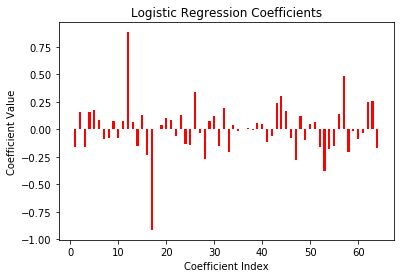

(1, 64)


In [21]:
#Use a large C to disable regularization
reg_full = linear_model.LogisticRegression(C = 1e5) #ADD CODE

# ADD CODE!!
reg_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

print(reg_full.coef_.shape)

## TO DO 2

### Questions: How many coefficients do you get (recall that the one-hot encoding has been used for some of the features)? Why? How many of them are "close" to 0? What do negative coefficient values mean? (max 5 lines)

### Answer to the questions
I get 64 coefficients.

## TO DO 3
### Predict labels on training and test

- Compute the predicted labels on training and test data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).
 - Evaluate the score used by logistic regression on training and test data using metrics.accuracy_score()

In [10]:
from sklearn import metrics

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

# COMPLETE
train_accuracy = metrics.accuracy_score(Y_training, Y_training_prediction_LR)
print('Accuracy on training set =', train_accuracy)

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# COMPLETE
test_accuracy = metrics.accuracy_score(Y_test, Y_test_prediction_LR)
print("Accuracy on test set =", test_accuracy)

Accuracy on training set = 1.0
Accuracy on test set = 0.5555555555555556


## TO DO 4
### Use L2 regularized logistic regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L2 regularized logistic regression, the following L2 regularization term is added to the loss:

$$
    \lambda \sum_{i=1}^d w_i^2
$$

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L2 penalty;
- use LogisticRegression() to learn the best model for the best C with L2 penalty on the entire training set

Note that LogisticRegressionCV() picks some default values of C to try, but you may need to pass some other values in case for your dataset you need to explore a different interval of values. This applies every time that you use LogisticRegressionCV().

In [26]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(solver='newton-cg',cv=10, penalty='l2') # COMPLETE

#fit the model on training data

# ADD CODE
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

#print(regL2.scores_)
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10) #COMPLETE

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

# COMPLETE
best_C = float(regL2.C_)
print('Best value of C as identified by cross-validation:', best_C)

# let's store the best CV accuracy, and then print it
#print(regL2.scores_[1])
regL2_best_CV_accuracy = np.max(regL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver

# COMPLETE
regL2_full = linear_model.LogisticRegression(penalty='l2', C=best_C, solver='newton-cg')

#fit the model using the best C on the entire training set

# ADD CODE
regL2_full.fit(X_training, Y_training)

Values of parameter C tried in 10-fold Cross-Validation: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.56253909 0.61719825 0.68699187 0.67661038 0.67110694 0.66135084
 0.66135084 0.66135084 0.66135084 0.66135084]
Best value of C as identified by cross-validation: 0.005994842503189409
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.7804878048780488


LogisticRegression(C=0.005994842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### TO DO 5: Print and plot the coefficients from logistic regression with and without regularization.

Coefficients from logistic regression: 
 [[-0.15636619  0.15636619 -0.15636619  0.15636619  0.17682262  0.08225929
  -0.08225929 -0.07553549  0.07553549 -0.08068632  0.08068632  0.88396996
   0.07216147 -0.1507728   0.13520872 -0.22940439 -0.91314046  0.00159764
   0.0422474   0.10058568  0.08419119 -0.0552958   0.1328273  -0.13019981
  -0.13796449  0.34245458 -0.03491176 -0.26697061  0.07343313  0.12461471
  -0.15000639  0.19175831 -0.20164694  0.0448722  -0.01227362  0.00579164
   0.01741037 -0.00929725  0.06338775  0.04689085 -0.11098235 -0.06003879
   0.23842012  0.30101777  0.16345065 -0.0770158  -0.28165076  0.12136789
  -0.09516437  0.0503693   0.06424955 -0.15905664 -0.37406348 -0.17662862
  -0.14777808  0.14041461  0.48578469 -0.2054273  -0.01161724 -0.0864103
  -0.03022454  0.24677854  0.26296969 -0.17134585]]
coefficients from L2 regularized logistic regression: 
 [[-0.09234711  0.09234711 -0.09234711  0.09234711  0.07934295  0.02978755
  -0.02978755 -0.04695306  0.04695306 

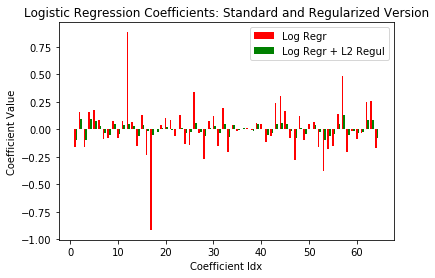

In [17]:
#print the coefficients from logistic regression

# ADD CODE
print('Coefficients from logistic regression: \n', reg_full.coef_)

#print the coefficients from L2 regularized logistic regression

# ADD CODE
print('coefficients from L2 regularized logistic regression: \n', regL2_full.coef_)

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='g')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

### TO DO 6: how do the coefficients from logistic regression with L2 regularization compare to the ones from logistic regression without regularization ? Why? (max 5 lines)

### Answer to the questions
The coefficients from L2 regolarization are smaller (in modulus).

### TO DO 7: obtain classification accuracy on training and test data for the L2 regularized model

In [29]:
#now get training and test error and print training and test accuracy

# predictions on training data 
Y_training_prediction_LR_L2 = regL2_full.predict(X_training)# COMPLETE

# predictions on test data 
Y_test_prediction_LR_L2 = regL2_full.predict(X_test) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
#print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2))

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
#print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2))



# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

# COMPLETE
training_accuracy_L2 = metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2)
print("Accuracy on training set =", training_accuracy_L2)

# prediction on test data
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# COMPLETE
test_accuracy_L2 = metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2)
print("Accuracy on test set =", test_accuracy_L2)

Accuracy on training set = 0.74
Accuracy on test set = 0.6867469879518072


### TO DO 8: How does training and test accuracies change when using regularization? Comment (max 5 lines)

### Answer to the question
The accurancy on the training get is smaller (0.74 vs. 1.0), but I think that in the non-regularization case there is overfitting. The accuracy on the test set is bigger (0.6867469879518072 vs. 0.5555555555555556).

### TO DO 9: Use larger datasets for training set

Perform the same estimation procedures using different more points on the training data, that is fix $m_{training} = 400$. You can simply copy and paste all the code you have written previously into the cell below.

----------------------------------------------------------------------
------------------------- DATA PREPROCESSING -------------------------
----------------------------------------------------------------------


[1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 

/Users/borto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


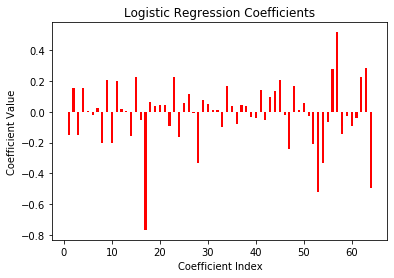

(1, 64)


----------------------------------------------------------------------
---------------- PREDICT LABELS FOR TRAINING AND TEST ----------------
----------------------------------------------------------------------


Accuracy on training set = 0.75
Accuracy on test set = 0.6345381526104418


----------------------------------------------------------------------
----------------------- USE L2 REGULARIZED LR ------------------------
----------------------------------------------------------------------


Values of parameter C tried in 10-fold Cross-Validation: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.54251407 0.65486554 0.6948843  0.66981395 0.67969199 0.6822561
 0.6822561  0.6822561  0.6822561  0.6822561 ]
Best value of C as identified by cross-validation: 0.005994842503189409
10-fold 

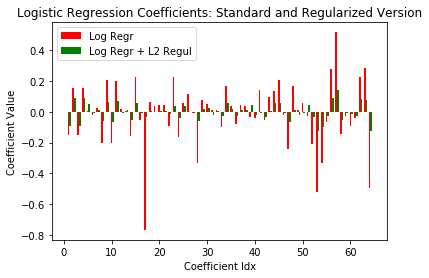



----------------------------------------------------------------------
----------------- OBTAIN ACCURACY OF REGULARIZED LR ------------------
----------------------------------------------------------------------


Training Accuracy: 0.7675
Test Accuracy: 0.6385542168674698
Accuracy on training set = 0.7675
Accuracy on test set = 0.6385542168674698


In [33]:
# COMPLETE
print('----------------------------------------------------------------------')
print('------------------------- DATA PREPROCESSING -------------------------')
print('----------------------------------------------------------------------')
print('\n')

# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 400 #  # use 400 samples for training + validation...
m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

################################
################################

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('--------------------- PERFORM LINEAR REGRESSION ----------------------')
print('----------------------------------------------------------------------')
print('\n')

reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
print(type(reg.scores_))
reg_best_CV_accuracy = max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('------------------- LEARN THE BEST MODEL FROM LR ---------------------')
print('----------------------------------------------------------------------')
print('\n')

#Use a large C to disable regularization
reg_full = linear_model.LogisticRegression(C = 1e5) #ADD CODE

# ADD CODE!!
reg_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

print(reg_full.coef_.shape)

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('---------------- PREDICT LABELS FOR TRAINING AND TEST ----------------')
print('----------------------------------------------------------------------')
print('\n')

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

# COMPLETE
train_accuracy = metrics.accuracy_score(Y_training, Y_training_prediction_LR)
print('Accuracy on training set =', train_accuracy)

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# COMPLETE
test_accuracy = metrics.accuracy_score(Y_test, Y_test_prediction_LR)
print("Accuracy on test set =", test_accuracy)

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('----------------------- USE L2 REGULARIZED LR ------------------------')
print('----------------------------------------------------------------------')
print('\n')

#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(solver='newton-cg',cv=10, penalty='l2')# COMPLETE

#fit the model on training data

# ADD CODE
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

#print(regL2.scores_)
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10) #COMPLETE

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

# COMPLETE
best_C = float(regL2.C_)
print('Best value of C as identified by cross-validation:', best_C)

# let's store the best CV accuracy, and then print it
#print(regL2.scores_[1])
regL2_best_CV_accuracy = np.max(regL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver

# COMPLETE
regL2_full = linear_model.LogisticRegression(penalty='l2', C=best_C, solver='newton-cg')

#fit the model using the best C on the entire training set

# ADD CODE
regL2_full.fit(X_training, Y_training)

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('------------- COMPARE REGULARIZED AND NON-REGULARIZED LR -------------')
print('----------------------------------------------------------------------')
print('\n')

#print the coefficients from logistic regression

# ADD CODE
print('Coefficients from logistic regression: \n', reg_full.coef_)

#print the coefficients from L2 regularized logistic regression

# ADD CODE
print('coefficients from L2 regularized logistic regression: \n', regL2_full.coef_)

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='g')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

################################
################################

print('\n')
print('----------------------------------------------------------------------')
print('----------------- OBTAIN ACCURACY OF REGULARIZED LR ------------------')
print('----------------------------------------------------------------------')
print('\n')

#now get training and test error and print training and test accuracy

# predictions on training data 
Y_training_prediction_LR_L2 = regL2_full.predict(X_training)# COMPLETE

# predictions on test data 
Y_test_prediction_LR_L2 = regL2_full.predict(X_test) # COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2))

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2))



# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

# COMPLETE
training_accuracy_L2 = metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2)
print("Accuracy on training set =", training_accuracy_L2)

# prediction on test data
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# COMPLETE
test_accuracy_L2 = metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2)
print("Accuracy on test set =", test_accuracy_L2)

### TO DO 10: Discuss all the questions above for the larger set (max 7 lines). Compare the impact of regularization in this case with the results you obtained for the smaller set.

### Answer to the question
The following table summarize the accuracy results.

|  | Accuracy on training set | Accuracy on test set |
| --- | --- | --- |
| Big set (no regularization) | 0.75 | 0.6345381526104418 |
| Big set (regularization) | 0.7675 | 0.6385542168674698 |
| Small set (no regularization) | 1.0 | 0.5555555555555556 |
| Small set (regularization) | 0.74 | 0.6867469879518072 |

In this case the accuracy on the training set is slightly bigger if I use the regularized logistic regression (0.7675 vs. 0.75). This is true also for the test accuracy on the test set (0.6385542168674698 vs. 0.6345381526104418), where the difference is even smaller. 